# IoT Weather Monitor
This project mimics a device that logs the weather conditions of a building every 60mins and stores the daily summary in a file

In [48]:
import matplotlib.pyplot as plt
def weather_summary():
    with open("weather_log.csv", 'r') as fh:
        lines = fh.readlines() # Reads the data from the file

    time, temperatures, humidities, pressures = [], [], [], []

    for line in lines[1:]:  # Processes the data into Python lists
        tim, temp, hum, pres = line.strip().split(", ")
        temperatures.append(float(temp))
        humidities.append(float(hum))
        pressures.append(float(pres)/10)
        time.append((tim.strip().split(" ")[1]).split(":")[0])  # Splits the time into hours, minutes, and seconds

    # Plotting the data
    plt.figure(figsize=(10, 5))
    plt.plot(time, temperatures,'r',humidities,'b',pressures,'g')
    plt.title("Weather Data")
    plt.legend(["Temperature (°C)", "Humidity (%)", "Pressure (KPa)"])
    plt.xlabel("Time (HH:MM:SS)")

    # Calculating the average temperature, humidity, and pressure
    avg_temp = sum(temperatures) / len(temperatures) 
    avg_hum = sum(humidities) / len(humidities) 
    avg_pres = sum(pressures) / len(pressures) 

    #print(avg_temp, avg_hum, avg_pres)

    # Storing the summary in a summary CSV file
    with open("weather_summary.csv", 'w') as fh:
        fh.write(f"Average Temperature: {avg_temp:.2f}°C\n")
        fh.write(f"Average Humidity: {avg_hum:.2f}%\n")
        fh.write(f"Average Pressure: {avg_pres:.2f} hPa\n")

    print("Weather summary saved.")

In [28]:
def log_weather(time, temperature, humidity, pressure):
    with open("weather_log.csv", 'a') as fh:
        fh.write(f"{time}, {temperature}, {humidity}, {pressure}\n")


## Simulation

Weather summary saved.


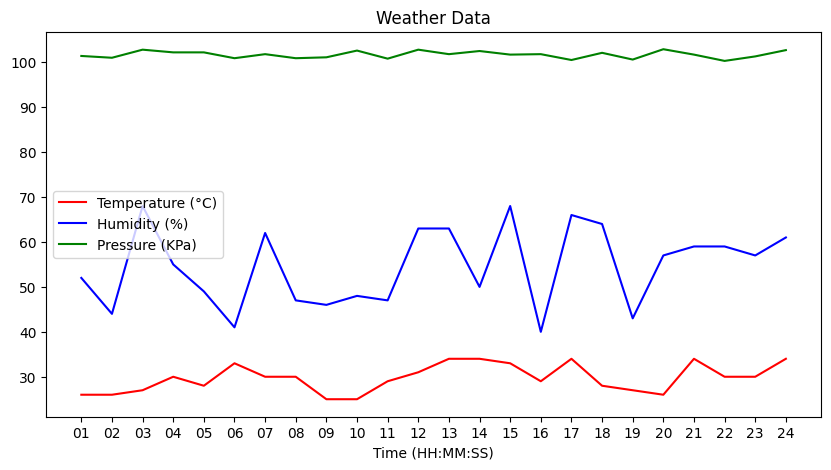

In [49]:
import random

with open("weather_log.csv", 'w') as fh:
        fh.write("Timestamp, Temperature(C), Humidity(%), Pressure(hPa)\n")

for i in range(24):  # 24 hour intervals 
    temp = int(random.uniform(25, 35))
    hum = int(random.uniform(40, 70))
    pres = int(random.uniform(1000, 1030))
    log_weather(f"2025-04-29 {str(i+1).rjust(2,'0')}:00", temp, hum, pres)

weather_summary()
